<a href="https://colab.research.google.com/github/khlodMohamed/Computer-Vision/blob/main/Image%20segmentation/FCNFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import os
from PIL import Image
from torch.utils.data import Dataset
import numpy as np
import torch
import torchvision

!pip install albumentations==0.4.6
import albumentations 

import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from google.colab import drive

import torch
import torch.nn as nn
import torchvision.transforms.functional as TF
from torch.utils.data import DataLoader


     |████████████████████████████████| 117 kB 5.1 MB/s 
     |████████████████████████████████| 948 kB 36.8 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65174 sha256=1e82906da24c12d6bc31a2f89fe2f1080e7c0385bca22efff032e9378d806f05
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


##Prep

In [ ]:
# connecting to drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
os.mkdir('/content/zip') 
%cd /content/zip
!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Data.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Part1_GroundTruth.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Validation_Data.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Validation_Part1_GroundTruth.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Test_v2_Data.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Test_v2_Part1_GroundTruth.zip

/content/zip
--2022-02-02 19:28:17--  https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Data.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.9.212
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.217.9.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6229496702 (5.8G) [application/zip]
Saving to: ‘ISIC-2017_Training_Data.zip’

ISIC-2017_Training_ 100%[===================>]   5.80G  40.0MB/s    in 2m 44s  

2022-02-02 19:31:01 (36.3 MB/s) - ‘ISIC-2017_Training_Data.zip’ saved [6229496702/6229496702]

--2022-02-02 19:31:02--  https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Part1_GroundTruth.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 54.231.128.225
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|54.231.128.225|:443... connected.
HTTP re

In [ ]:
os.mkdir('/content/unzip') 
%cd /content/unzip
print(os.getcwd())
!unzip /content/zip/ISIC-2017_Training_Data.zip
!unzip /content/zip/ISIC-2017_Training_Part1_GroundTruth.zip
!unzip /content/zip/ISIC-2017_Validation_Data.zip
!unzip /content/zip/ISIC-2017_Validation_Part1_GroundTruth.zip
!unzip /content/zip/ISIC-2017_Test_v2_Data.zip
!unzip /content/zip/ISIC-2017_Test_v2_Part1_GroundTruth.zip

Streaming output truncated to the last 5000 lines.
  inflating: ISIC-2017_Training_Data/ISIC_0013862.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0013862_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0013864.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0013864_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0013865.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0013865_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0013874.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0013874_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0013876.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0013876_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0013879.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0013879_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0013886.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0013886_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0013888.jpg  
  inflating: ISIC-2017_Tr

In [ ]:
%cd /content/unzip/ISIC-2017_Training_Data
!rm ISIC-2017_Training_Data_metadata.csv
!rm *.png
%cd /content/unzip/ISIC-2017_Validation_Data
!rm ISIC-2017_Validation_Data_metadata.csv
!rm *.png
%cd /content/unzip/ISIC-2017_Test_v2_Data
!rm ISIC-2017_Test_v2_Data_metadata.csv
!rm *.png
%cd /content

/content/unzip/ISIC-2017_Training_Data
/content/unzip/ISIC-2017_Validation_Data
/content/unzip/ISIC-2017_Test_v2_Data
/content


In [ ]:
#remove .ipynb_checkpoints
%cd /content/unzip/ISIC-2017_Training_Data
%rm -rf `find -type d -name .ipynb_checkpoints`
%cd /content/unzip/ISIC-2017_Validation_Data
%rm -rf `find -type d -name .ipynb_checkpoints`
%cd /content

/content/unzip/ISIC-2017_Training_Data
/content/unzip/ISIC-2017_Validation_Data
/content


In [ ]:

val_ = os.listdir('/content/unzip/ISIC-2017_Validation_Data')
val_m = os.listdir('/content/unzip/ISIC-2017_Validation_Part1_GroundTruth')
train_ = os.listdir('/content/unzip/ISIC-2017_Training_Data')
train_m = os.listdir('/content/unzip/ISIC-2017_Training_Part1_GroundTruth')
test_ = os.listdir('/content/unzip/ISIC-2017_Test_v2_Data')
test_m = os.listdir('/content/unzip/ISIC-2017_Test_v2_Part1_GroundTruth')
print(len(train_))
print(len(train_m))
print(len(val_))
print(len(val_m))
print(len(test_))
print(len(test_m))

2000
2000
150
150
600
600


##Functions

In [ ]:
import os, shutil
def delete(folder_path):
  for filename in os.listdir(folder_path):
      file_path = os.path.join(folder_path, filename)
      try:
          if os.path.isfile(file_path) or os.path.islink(file_path):
              os.unlink(file_path)
          elif os.path.isdir(file_path):
              shutil.rmtree(file_path)
      except Exception as e:
          print('Failed to delete %s. Reason: %s' % (file_path, e))
def show_img(folder_path, i):
  temp = os.listdir(folder_path)
  img_path = os.path.join(folder_path, temp[i])
  img = cv2.imread(img_path)
  print(img.shape)
  cv2_imshow(img)


In [ ]:
# delete("/content/saved_images")

##Dataset

In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset
import numpy as np

class ISICDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = os.listdir(image_dir)
        # self.images = self.images[0:20]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        img_path = os.path.join(self.image_dir, self.images[index])
        mask_path = os.path.join(self.mask_dir, self.images[index].replace(".jpg", "_segmentation.png"))
        image = np.array(Image.open(img_path).convert("RGB"))
        mask = np.array(Image.open(mask_path).convert("L"), dtype=np.float32)



        mask[mask == 255.0] = 1.0

        if self.transform is not None:
            augmentations = self.transform(image=image, mask=mask)
            image = augmentations["image"]
            mask = augmentations["mask"]

        return image, mask


##Utili


In [ ]:

from torch.utils.data import DataLoader
%cd /content
def save_checkpoint(state, filename):
    print("=> Saving checkpoint")
    torch.save(state, filename)

def load_checkpoint(checkpoint, model):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])


def get_loaders(
    train_dir,
    train_maskdir,
    val_dir,
    val_maskdir,
    test_dir,
    test_maskdir,
    batch_size_train,
    batch_size_val,
    batch_size_test,
    train_transform,
    val_transform,
    num_workers=4,
    pin_memory=True,
):
    train_ds = ISICDataset(
        image_dir=train_dir,
        mask_dir=train_maskdir,
        transform=train_transform,
    )

    train_loader = DataLoader(
        train_ds,
        batch_size=batch_size_train,
        num_workers=num_workers,
        pin_memory=pin_memory,
        shuffle=True,
    )

    val_ds = ISICDataset(
        image_dir=val_dir,
        mask_dir=val_maskdir,
        transform=val_transform,
    )

    val_loader = DataLoader(
        val_ds,
        batch_size=batch_size_val,
        num_workers=num_workers,
        pin_memory=pin_memory,
        shuffle=False,
    )
    test_ds = ISICDataset(
        image_dir=val_dir,
        mask_dir=val_maskdir,
        transform=val_transform,
    )

    test_loader = DataLoader(
        val_ds,
        batch_size=batch_size_test,
        num_workers=num_workers,
        pin_memory=pin_memory,
        shuffle=False,
    )
    return train_loader, val_loader, test_loader


/content


##Model

In [ ]:

VGG_types = {
    "VGG11": [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG13": [64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG16": [64,64,"M",128,128,"M",256,256,256,"M",512,512,512,"M",512,512,512,"M"],
    "VGG19": [64,64,"M",128,128,"M",256,256,256,256,"M",512,512,512,512,"M",512,512,512,512,"M"],
}


class FCN (nn.Module):
    def __init__(self, in_channels=3, num_classes=2):
        super(FCN, self).__init__()
        self.in_channels = in_channels
        self.conv_layers = self.create_conv_layers(VGG_types["VGG16"])
        self.fcs = nn.Sequential(
            nn.Conv2d(
                in_channels=512,
                out_channels=512,
                kernel_size=(1, 1),
                stride=(1, 1),
            ),
            # nn.BatchNorm2d(x),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=512,
                out_channels=512,
                kernel_size=(1, 1),
                stride=(1, 1),
            ),  
            # nn.BatchNorm2d(x),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=512,
                out_channels=num_classes,
                kernel_size=(1, 1),
                stride=(1, 1),
            ),     
               )

        self.upconv = nn.Sequential(
                     
                     nn.ConvTranspose2d(num_classes, num_classes, kernel_size=(32,32), stride=(32,32)),
                     nn.ReLU(),
        )

        
    def forward(self, x):
        x = self.conv_layers(x)      
        x=self.fcs(x)      
        x = self.upconv(x)
        return x

    def create_conv_layers(self, architecture):
        layers = []
        in_channels = self.in_channels

        for x in architecture:
            if type(x) == int:
                out_channels = x

                layers += [
                    nn.Conv2d(
                        in_channels=in_channels,
                        out_channels=out_channels,
                        kernel_size=(3, 3),
                        stride=(1, 1),
                        padding=(1, 1),
                    ),
                    nn.BatchNorm2d(x),
                    nn.ReLU(),
                ]
                in_channels = x
            elif x == "M":
                layers += [nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))]
        
        return nn.Sequential(*layers)


def test():
    x = torch.randn(3, 3, 896, 896)
    model = FCN (in_channels=3, num_classes=3)
    preds = model(x)
    print(preds.shape)
    assert preds.shape == x.shape

if __name__ == "__main__":
    test()


torch.Size([3, 3, 896, 896])


##Loss

In [ ]:

def loss_fn(inputs, targets, smooth=0.5):

    #comment out if your model contains a sigmoid or equivalent activation layer
    inputs = torch.sigmoid(inputs)    
    inputs.data = (inputs.data > 0.5 ).float()
    inputs = inputs.view(-1)
    targets = targets.view(-1)
    #flatten label and prediction tensors

    
    #intersection is equivalent to True Positive count
    #union is the mutually inclusive area of all labels & predictions 
    intersection = (inputs * targets).sum()
    total = (inputs + targets).sum()
    union = total - intersection 
    
    IoU = (intersection + smooth)/(union + smooth)
    return 1 - IoU

##Transformations

In [ ]:
def get_transformations():
  train_transform = A.Compose(
      [
          A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
          A.Rotate(limit=35, p=0.75),
          # A.HorizontalFlip(p=0.5),
          A.HorizontalFlip(p=0.75),
          A.VerticalFlip(p=0.75),
          A.Normalize(
              mean=[0.0, 0.0, 0.0],
              std=[1.0, 1.0, 1.0],
              max_pixel_value=255.0,
          ),
          
          ToTensorV2(),
      ],
  )

  val_transforms = A.Compose(
      [
          A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
          A.Normalize(
              mean=[0.0, 0.0, 0.0],
              std=[1.0, 1.0, 1.0],
              max_pixel_value=255.0,
          ),
          ToTensorV2(),
      ],
  )

  return train_transform, val_transforms

##Train/Test/Val functions 

In [ ]:
def train_fn(loader, model, optimizer, loss_fn, scaler,epo):
    losses = []
    avg_loss = 0
    loop = tqdm(loader, total=len(loader))
    for batch_idx, (data, targets) in enumerate(loop):
      data = data.to(device=DEVICE)
      targets = targets.float().unsqueeze(1).to(device=DEVICE)

      # forward
      with torch.cuda.amp.autocast():
          predictions = model(data)
          loss = loss_fn(predictions, targets)
          losses.append(loss)
          avg_loss = sum(losses)/len(losses)


      # backward
      optimizer.zero_grad()
      scaler.scale(loss).backward()
      scaler.step(optimizer)
      scaler.update()
        # update tqdm loop
      loop.set_description(f"Train: {epo}")
      loop.set_postfix(loss = avg_loss.cpu().detach().numpy())


    

def val_fn(loader, model, loss_fn):
    loop = tqdm(loader, total=len(loader))
    avg_loss = 0
    losses = []
    model.eval()
    with torch.no_grad():
      for batch_idx, (data, targets) in enumerate(loop):
          data = data.to(device=DEVICE)
          targets = targets.float().unsqueeze(1).to(device=DEVICE)
          predictions = model(data)
          loss = loss_fn(predictions, targets)
          losses.append(loss)
          avg_loss = sum(losses)/len(losses)
          loop.set_description(f"Val")
          loop.set_postfix(loss = avg_loss.cpu().numpy())

    model.train()
    return avg_loss
 
def test_fn(loader, model, loss_fn, folder):
  loop = tqdm(loader, total=len(loader))
  losses = []
  avg_loss = 0
  model.eval()
  for batch_idx, (data, targets) in enumerate(loop):
    data = data.to(device=DEVICE)
    with torch.no_grad():
      targets = targets.float().unsqueeze(1).to(device=DEVICE)
      predictions = model(data)
      loss = loss_fn(predictions, targets)
      losses.append(loss)
    avg_loss = sum(losses)/len(losses)
    loop.set_description(f"Test")
    loop.set_postfix(loss = avg_loss.cpu().numpy())
    torchvision.utils.save_image(
            predictions, f"{folder}/pred_{batch_idx}.png"
        )
    torchvision.utils.save_image(targets, f"{folder}/mask_{batch_idx}.png")
    torchvision.utils.save_image(data, f"{folder}/ori_{batch_idx}.png")
  model.train()
  return avg_loss, losses
    

##PreTrained

In [ ]:
def pretrained_():
  class Identity(nn.Module):
    def __init__ (self):
      super(Identity,self).__init__()
    def forward(self,x):
      return x;

  model= torchvision.models.vgg16(pretrained=False)

  for param in model.parameters():
    param.requires_grade= False

  # model.avgpool=Identity()
  model.classifier=nn.Sequential(
      nn.Conv2d(
          in_channels=512,
          out_channels=512,
          kernel_size=(1, 1),
          stride=(1, 1),
      ),
      nn.ReLU(),
      nn.Conv2d(
          in_channels=512,
          out_channels=512,
          kernel_size=(1, 1),
          stride=(1, 1),
      ),
      nn.ReLU(),
              nn.Conv2d(
                  in_channels=512,
                  out_channels=1,
                  kernel_size=(1, 1),
                  stride=(1, 1),
              ),
      nn.ConvTranspose2d(1, 1, kernel_size=(32,32), stride=(32,32)),
      nn.ReLU(),
  )
  model.to(DEVICE)
  return model

##Main

In [ ]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim

for i in range(10):
  torch.cuda.empty_cache()
  import gc
  gc.collect()

# Hyperparameters etc.
LEARNING_RATE = 1e-3
# 1e-4 --> overfitss "Train loss decrease while the val loss increase"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE_TRAIN = 4
BATCH_SIZE_VAL = 1
BATCH_SIZE_TEST = 1
NUM_EPOCHS =  50
NUM_WORKERS = 1
IMAGE_HEIGHT = 896 # 1280 originally
IMAGE_WIDTH = 896  # 1918 originally
PIN_MEMORY = True
LOAD_MODEL = True
import tensorflow as tf
TRAIN_IMG_DIR = "/content/unzip/ISIC-2017_Training_Data/"
TRAIN_MASK_DIR = "/content/unzip/ISIC-2017_Training_Part1_GroundTruth/"
VAL_IMG_DIR = "/content/unzip/ISIC-2017_Validation_Data/"
VAL_MASK_DIR = "/content/unzip/ISIC-2017_Validation_Part1_GroundTruth/"
TEST_IMG_DIR = "/content/unzip/ISIC-2017_Test_v2_Data"
TEST_MASK_DIR = "/content/unzip/ISIC-2017_Test_v2_Part1_GroundTruth"
pre = False

train_transform, val_transforms = get_transformations()

train_loader, val_loader, test_loader = get_loaders(
    TRAIN_IMG_DIR,
    TRAIN_MASK_DIR,
    VAL_IMG_DIR,
    VAL_MASK_DIR,
    TEST_IMG_DIR,
    TEST_MASK_DIR,
    BATCH_SIZE_TRAIN,
    BATCH_SIZE_VAL,
    BATCH_SIZE_TEST,
    train_transform,
    val_transforms,        
    PIN_MEMORY,
)

##Pre Trained 

In [ ]:
def train_pretrained(filename):
  loss_tracker = 1
  model = pretrained_()
  optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
  scaler = torch.cuda.amp.GradScaler()
  filename 
  if torch.cuda.is_available():
    model.cuda()

  for epoch in range(NUM_EPOCHS):
        
    train_fn(train_loader, model, optimizer,loss_fn, scaler, epoch)
    avg_loss = val_fn(val_loader, model, loss_fn)
    avg_loss = avg_loss.cpu().numpy()
    print(avg_loss)
    if (avg_loss < loss_tracker): 
      loss_tracker = avg_loss       
      checkpoint = {
          "state_dict": model.state_dict(),
          "optimizer":optimizer.state_dict(),
      }
      save_checkpoint(checkpoint, filename)

## Training##

In [ ]:
def train(filename, LOAD_MODEL):
  loss_tracker = 1
  model =  FCN (in_channels=3, num_classes=1).to(DEVICE)  
  if LOAD_MODEL:
    load_checkpoint(torch.load(filename), model)
    loss_tracker = val_fn(val_loader, model, loss_fn)
    loss_tracker = loss_tracker.cpu().numpy()
    print(loss_tracker)

  optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
  scaler = torch.cuda.amp.GradScaler()

  if torch.cuda.is_available():
    model.cuda()

  for epoch in range(NUM_EPOCHS):    
    train_fn(train_loader, model, optimizer,loss_fn, scaler, epoch)
    avg_loss = val_fn(val_loader, model, loss_fn)
    avg_loss = avg_loss.cpu().numpy()
    print(avg_loss)
    if (avg_loss < loss_tracker): 
      loss_tracker = avg_loss       
      checkpoint = {
          "state_dict": model.state_dict(),
          "optimizer":optimizer.state_dict(),
      }
      save_checkpoint(checkpoint, filename)


##Test 

In [ ]:
def test(model, checkpoint):  
  load_checkpoint(torch.load(checkpoint), model)
  scores, losses = test_fn(test_loader, model, loss_fn, "/content/saved_images")
  return scores, losses

In [ ]:
model =  FCN (in_channels=3, num_classes=1).to(DEVICE) 
# model = pretrained_()
checkpoint = "/content/drive/MyDrive/Colab Notebooks/Computer Vision/my_checkpointFCN2.pth.tar"

scores, losses = test(model, checkpoint)

print(f"\nAverage IOU loss: {scores}")
j2 = [i for i in losses if i < 0.5]
print(f"{round((len(j2)/len(losses))*100,2)} % of the test images with loss less than 0.5")

=> Loading checkpoint


Test: 100%|██████████| 150/150 [01:56<00:00,  1.29it/s, loss=0.5155109]


Average IOU loss: 0.5155109167098999
58.0 % of the test images with loss less than 0.5


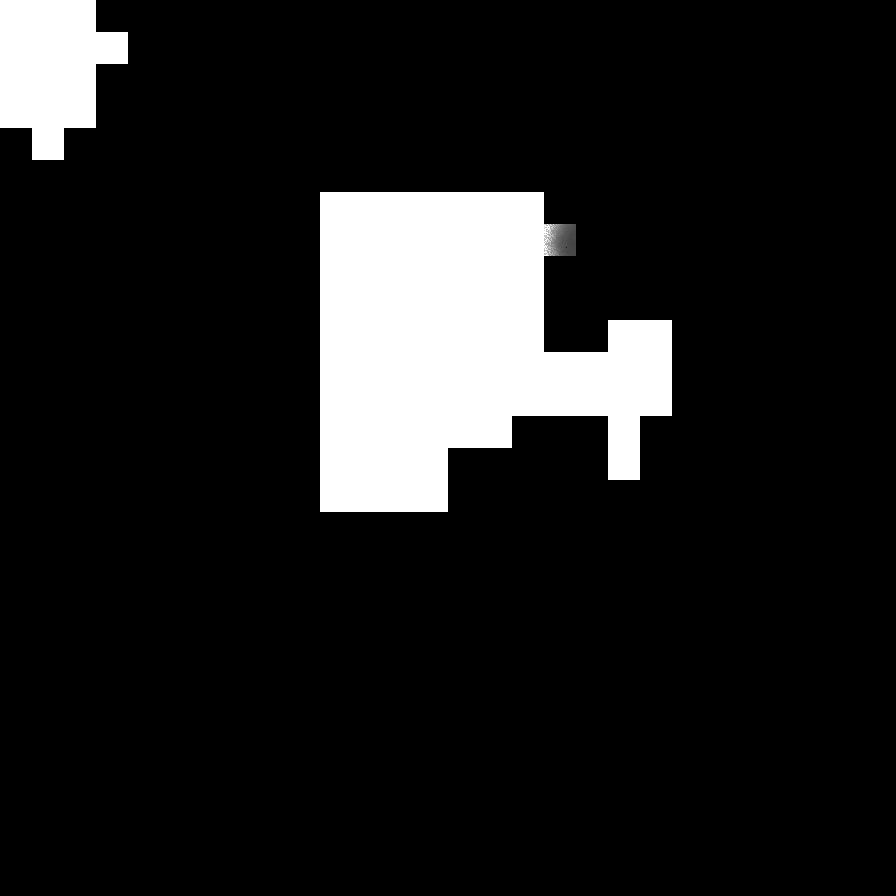

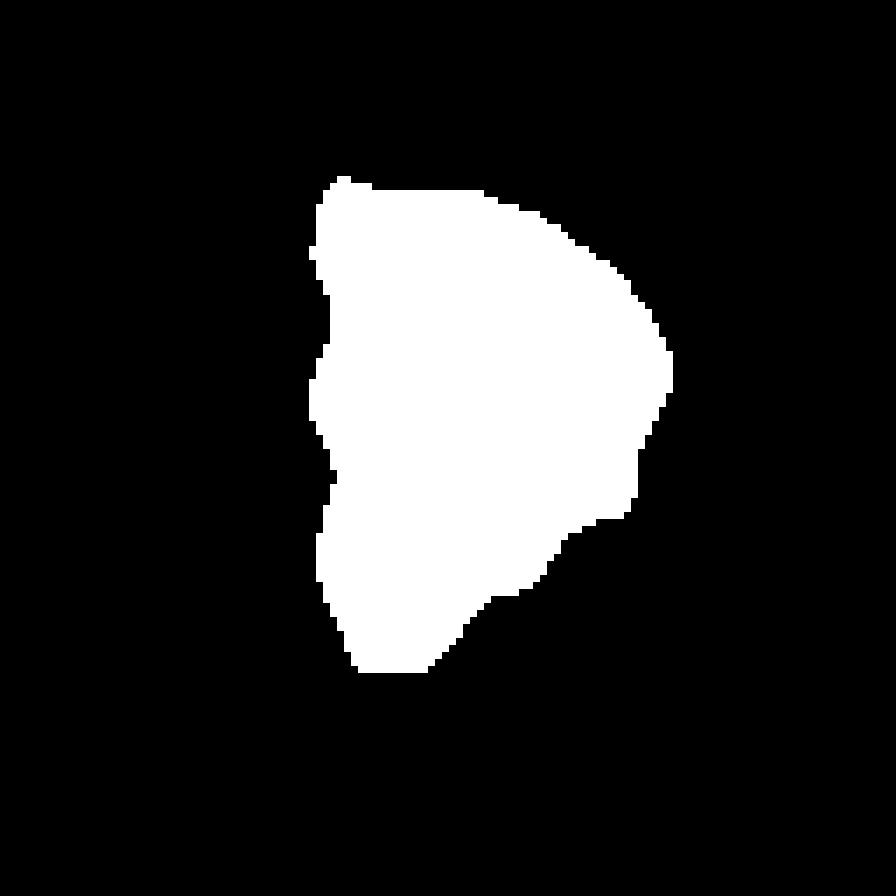

In [ ]:
# min_value = min(losses)
min_value = [i for i in losses if i <0.7]
index = 25
min_index = losses.index(min_value[index])
img_path_pred = "/content/saved_images/pred_"+str(min_index)+".png"
img_path_org = "/content/saved_images/mask_"+str(min_index)+".png"
img_pred = cv2.imread(img_path_pred)
img_org = cv2.imread(img_path_org)


cv2_imshow(img_pred)
cv2_imshow(img_org)

##Run

In [ ]:
filename = "/content/drive/MyDrive/Colab Notebooks/Computer Vision/my_checkpointFCN2.pth.tar"
LOAD_MODEL = True
train(filename, LOAD_MODEL)

=> Loading checkpoint


Val: 100%|██████████| 150/150 [01:06<00:00,  2.25it/s, loss=0.5553569]


0.5553569


Val: 100%|██████████| 150/150 [01:10<00:00,  2.13it/s, loss=0.5399679]


0.5399679
=> Saving checkpoint


Val: 100%|██████████| 150/150 [01:10<00:00,  2.14it/s, loss=0.5521233]


0.5521233


Val: 100%|██████████| 150/150 [01:10<00:00,  2.12it/s, loss=0.5155109]


0.5155109
=> Saving checkpoint


Val: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s, loss=0.5661249]


0.5661249


Val: 100%|██████████| 150/150 [01:06<00:00,  2.25it/s, loss=0.76710016]


0.76710016


Val: 100%|██████████| 150/150 [01:10<00:00,  2.12it/s, loss=0.7068149]


0.7068149


Val: 100%|██████████| 150/150 [01:10<00:00,  2.12it/s, loss=0.9999871]


0.9999871


Train: 7:  20%|█▉        | 99/500 [01:56<07:52,  1.18s/it, loss=0.9999995]


KeyboardInterrupt: ignored